# Importing basic libaries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### loading the data-set and viewing the data briefly and statistically

In [3]:
data = pd.read_csv("customer_purchase_data.csv")
data

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [4]:
data.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


### Explanation of the including features

Age: Customer's age <br>Gender: Customer's gender (0: Male, 1: Female)<br>
Annual Income: Annual income of the customer in dollars <br>Number of Purchases: Total number of purchases made by the customer<br> Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)<br> Time Spent on Website: Time spent by the customer on the website in minutes<br> Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes) <br>Discounts Availed: Number of discounts availed by the customer (range: 0-5)<br> PurchaseStatus: Likelihood of the customer making a purchase (0: No, 1: Yes)

# Data Preprossing 

## Encoding the categorical variables
### All the features in this dataset have been already encoded in a numerical data, so we can skip this step.

### Checking whether the missing values are present the data?

In [13]:
data.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

### **Remark**: the data is obtained from the Kaggle, the data may have been handled for missing value as there is no missing value. 

### Checking the duplicates are present in the data?

In [17]:
# Checking for total number of duplicates
duplicates = data.duplicated() 
print("Number of duplicate rows:", duplicates.sum())

# Briefly showing duplicate rows
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(data[duplicates])

# Check which columns are duplicated within the duplicate rows
duplicate_columns = []
for col in data.columns:
    if data[col].duplicated().any():
        duplicate_columns.append(col)

print("Columns with duplicate values:", duplicate_columns,"\n")

Number of duplicate rows: 112
Duplicate rows:
      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
243    57       1   79069.053493                  8                4   
271    43       0  101042.774561                 14                4   
299    65       1   55499.205296                 20                4   
304    50       0   41425.926045                  6                0   
306    56       1   48679.553852                 17                1   
...   ...     ...            ...                ...              ...   
1461   67       1  110466.885362                 17                0   
1484   68       0   80311.223269                 14                2   
1485   21       1  120794.999552                 10                0   
1492   63       0   71874.591294                 10                2   
1493   34       1   20418.374269                  9                1   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
243         

In [19]:
#Example of first duplicate row
data[(data['Age']==57) & (data['NumberOfPurchases']==8) & (data['ProductCategory']==4)]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
150,57,1,79069.053493,8,4,43.221622,0,2,0
243,57,1,79069.053493,8,4,43.221622,0,2,0


In [25]:
#Example of second last duplicate row
data[(data['Age']==63) & (data['NumberOfPurchases']==10) & (data['ProductCategory']==2)]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
671,63,0,71874.591294,10,2,43.546243,0,1,0
1492,63,0,71874.591294,10,2,43.546243,0,1,0


In [27]:
#Example of last duplicate row
data[(data['Age']==34) & (data['NumberOfPurchases']==9) & (data['ProductCategory']==1)]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
780,34,1,20418.374269,9,1,54.459955,0,0,0
1493,34,1,20418.374269,9,1,54.459955,0,0,0


In [29]:
#Drop Duplicates
data.drop_duplicates(inplace = True)

#Checking if delete was successful 
print("Number of Duplicate rows:",data.duplicated().sum())
print("The shape of the DataFrame is:", data.shape)

Number of Duplicate rows: 0
The shape of the DataFrame is: (1388, 9)


### **Remark** There are 112 of duplicated datas are found, after futher analysis of duplicate data, from 1500 rows, removing 112 duplicated rows are done, 1388 rows are left.

## After confirming that no missing values and no duplicates, the data needs to be **analysed** for every feature before predicting the target

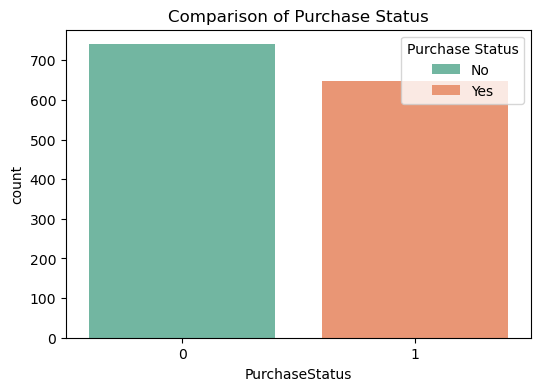

In [31]:
# Previewing the comparison of the target(PurchaseStatus) variable
plt.figure(figsize=(6,4))
sns.countplot(x='PurchaseStatus', data=data, hue='PurchaseStatus', palette='Set2')
plt.title('Comparison of Purchase Status')
plt.legend(title="Purchase Status", labels=['No', 'Yes'])
plt.savefig("purchaseStatus.png", dpi=100, bbox_inches="tight")
plt.show()

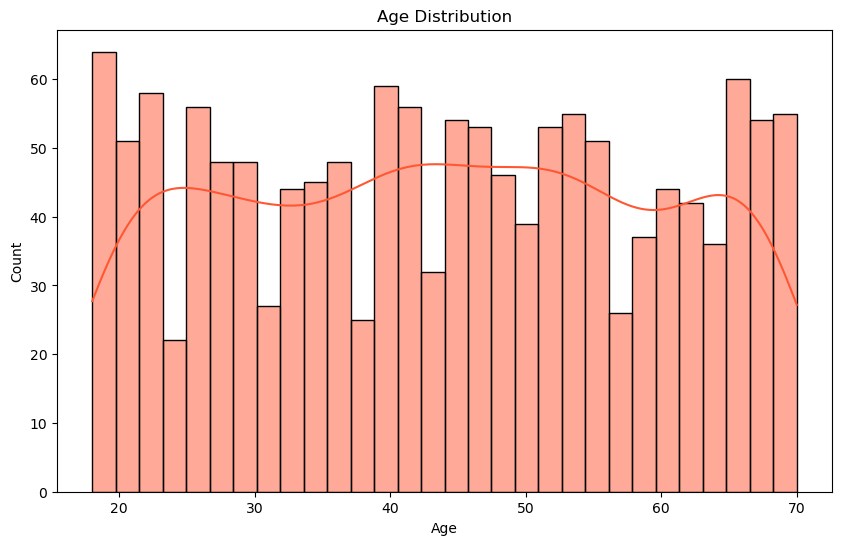

In [33]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True, color='#FF5733')
plt.title('Age Distribution')
plt.savefig("ageDistribution.png", dpi=100, bbox_inches="tight")
plt.show()

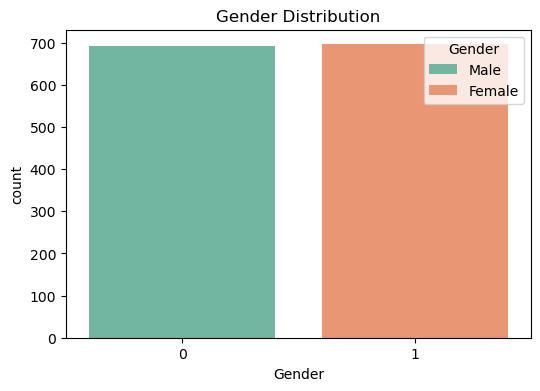

In [35]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data, hue='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.legend(title="Gender", labels=['Male', 'Female'])
plt.savefig("gender.png", dpi=100, bbox_inches="tight")
plt.show()

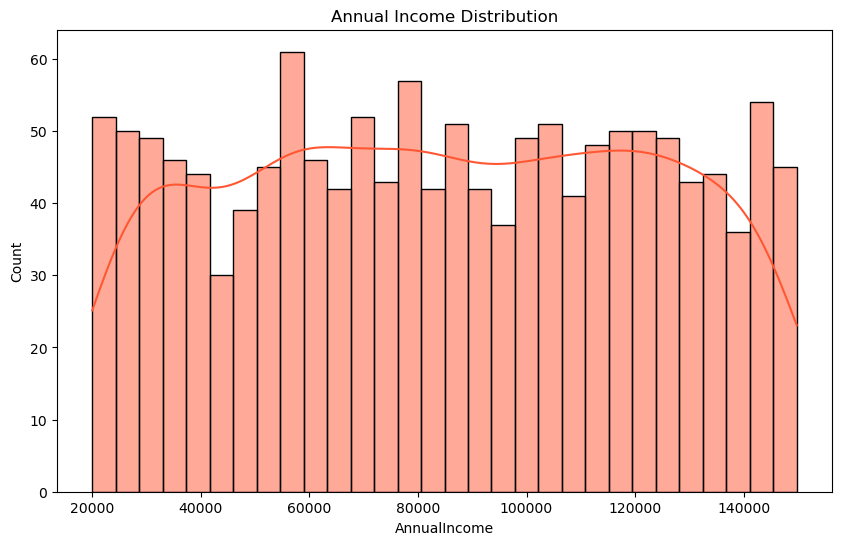

In [37]:
# Annual Income distribution
plt.figure(figsize=(10,6))
sns.histplot(data['AnnualIncome'], bins=30, kde=True , color='#FF5733')
plt.title('Annual Income Distribution')
plt.savefig("annualIncome.png", dpi=100, bbox_inches="tight")
plt.show()

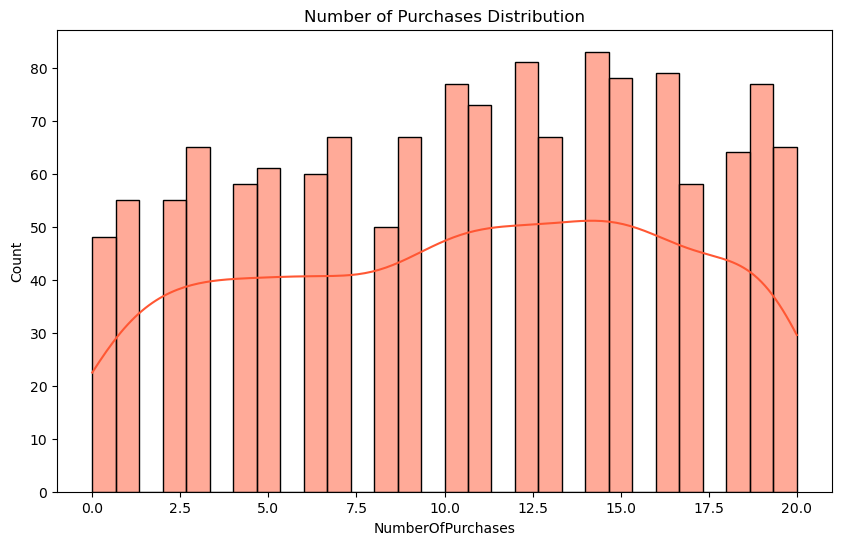

In [39]:
# Number of Purchases distribution
plt.figure(figsize=(10,6))
sns.histplot(data['NumberOfPurchases'], bins=30, kde=True, color='#FF5733')
plt.title('Number of Purchases Distribution')
plt.savefig("noofPurchase.png", dpi=100, bbox_inches="tight")
plt.show()

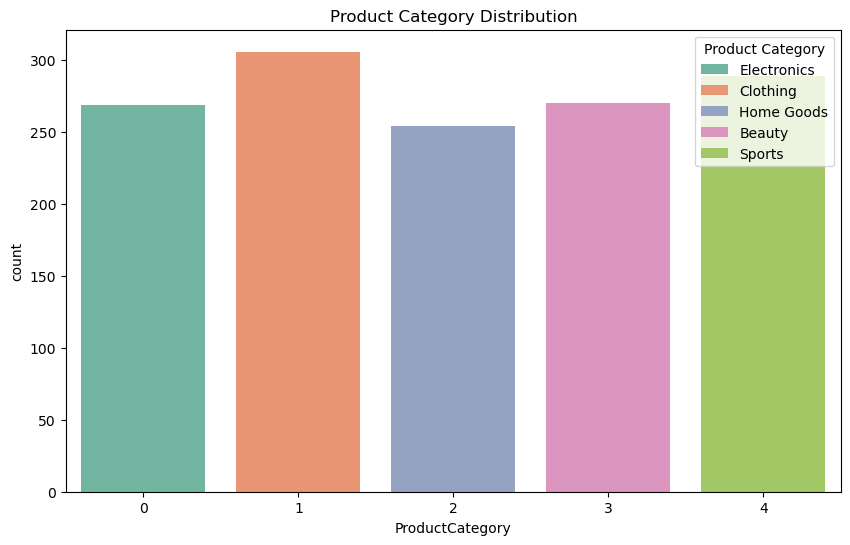

In [41]:
# Product Category distribution
plt.figure(figsize=(10,6))
sns.countplot(x='ProductCategory', data=data , hue ='ProductCategory', palette='Set2')
plt.title('Product Category Distribution')
plt.legend(title="Product Category", labels=['Electronics', 'Clothing', 'Home Goods', 'Beauty','Sports'])
plt.savefig("productCategory.png", dpi=100, bbox_inches="tight")
plt.show()

**Remark** All the features including the target are almost evenly distributed according the above analysis pattern

## Finding correlation coefficients with correlation matrix before prediction

<tab> It is a table showing correlation between two variables. 
<br>The value of the correlation coefficient ranges from -1 to +1, where:
<br>+1 indicates a perfect positive correlation 
<br>0 indicates no correlation 
<br>-1 indicates a perfect negative correlation 

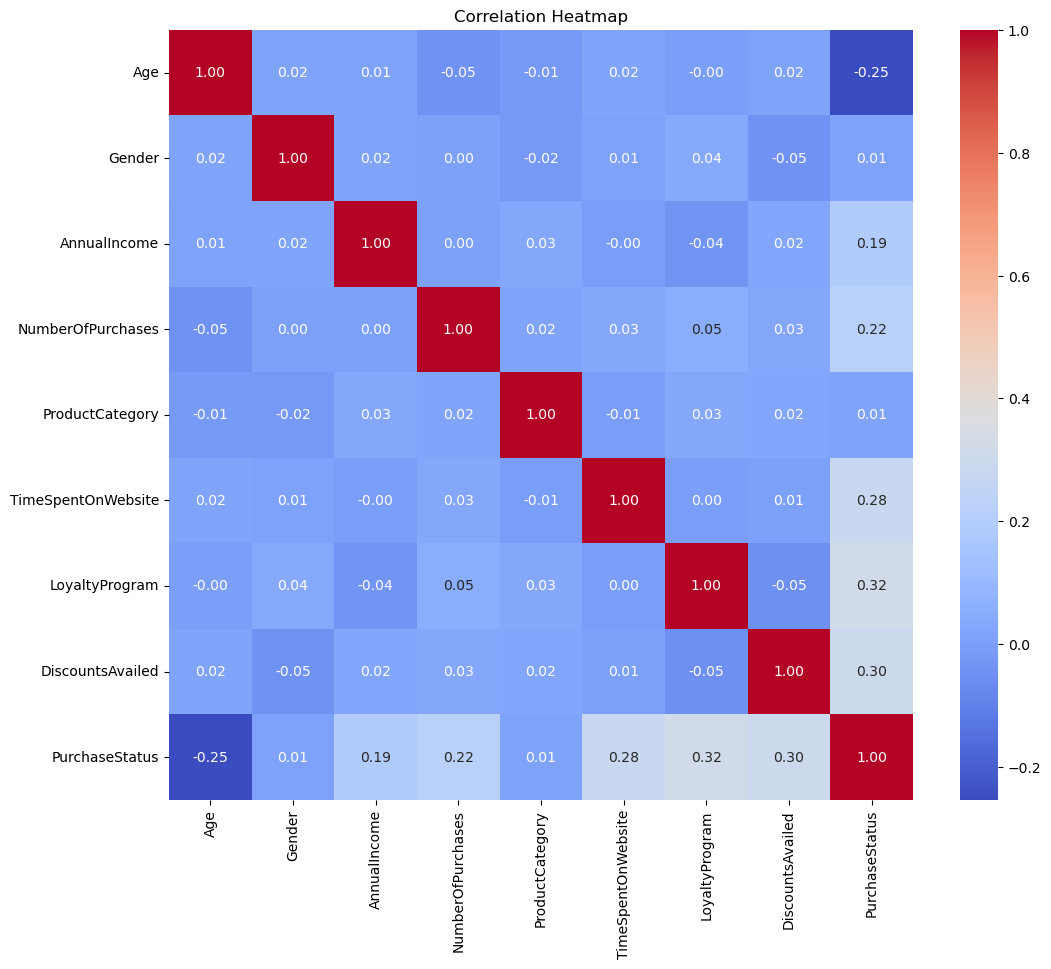

In [46]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig("correlationHeatmap.png", dpi=100, bbox_inches="tight")
plt.show()

In [48]:
correlation_matrix = data.corr()
print(correlation_matrix['PurchaseStatus'].abs())

Age                   0.253598
Gender                0.008856
AnnualIncome          0.191218
NumberOfPurchases     0.219116
ProductCategory       0.014349
TimeSpentOnWebsite    0.282127
LoyaltyProgram        0.318059
DiscountsAvailed      0.296606
PurchaseStatus        1.000000
Name: PurchaseStatus, dtype: float64


**Weak Correlations**: Age shows a weak negative correlation with PurchaseStatus (-0.25), showing that older individuals are slightly less likely to engage in purchases.<br>
**Positive Correlations** : TimeSpentOnWebsite (0.28), LoyaltyProgram (0.32), and DiscountsAvailed (0.30) show moderate positive correlations with PurchaseStatus.
This indicates that customers who spend more time on the website, participate in loyalty programs, or avail discounts are more likely to make purchases.<br>
**Near-Independence**: Gender and ProductCategory exhibit almost no correlation with PurchaseStatus (values close to 0), showing that these features may not have great influence on purchasing behavior.<br>
<br>We can say that the positive correlations with LoyaltyProgram and DiscountsAvailed highlight opportunities to increase purchase likelihood if increase in loyalty and discounts. The diagonal elements of the matrix are all 1, representing perfect self-correlation.


## Separating the data into feature (X) and target (y) and splitting the data into train data and test data

### from the correlation matrix, feature engineering can be done by dropping the Gender and ProductCategory

In [55]:
# Separating the target(y) and feature(X)
feature_selected = ['Age', 'AnnualIncome','NumberOfPurchases','TimeSpentOnWebsite','LoyaltyProgram','DiscountsAvailed']
X = data[feature_selected]
y = data['PurchaseStatus']

In [57]:
# Confriming the shape of X and y
print(X.shape)
print(y.shape)

(1388, 6)
(1388,)


In [59]:
# Importing the libraries for train data & test data splitting and standardization
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [61]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [63]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Importing the libraries for the models, accuracy and confusion matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

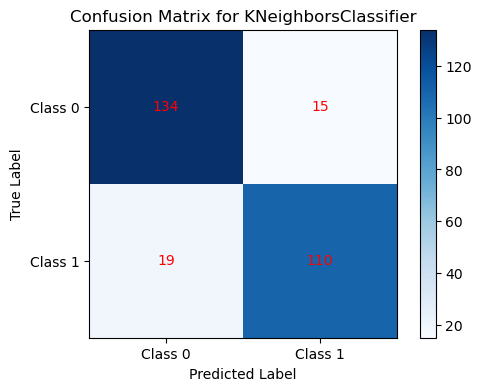

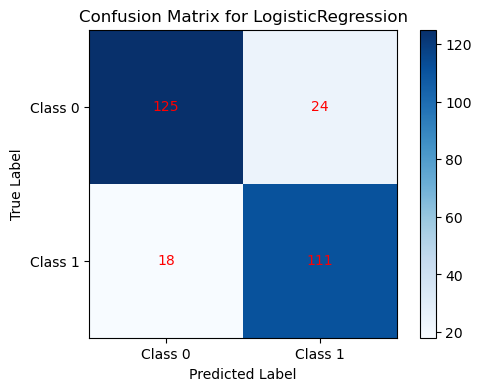

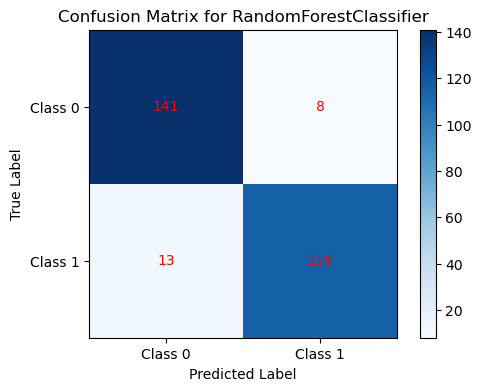

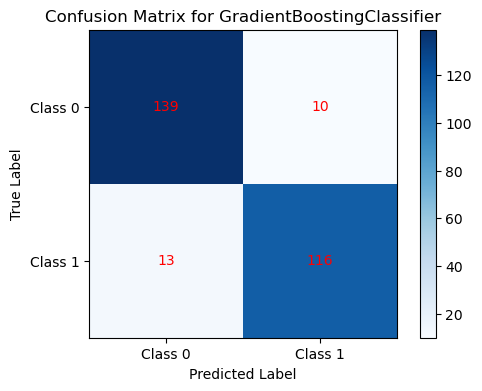

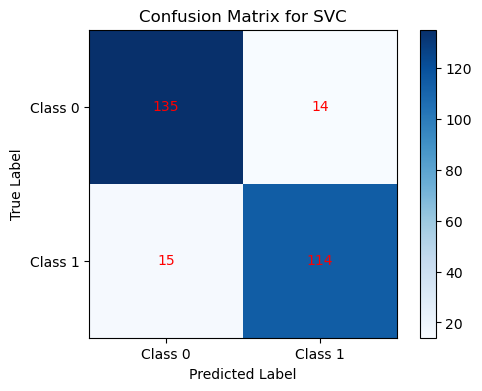

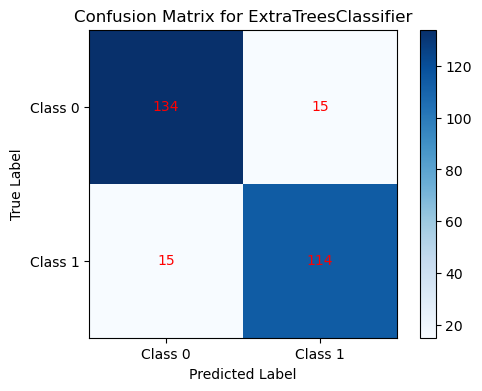

In [67]:
# Define models
models = [
    KNeighborsClassifier(),
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(probability=True, random_state=42),  # Enable probability for ROC curve
    ExtraTreesClassifier(random_state=42)
]
# finding out the confusion matrix by looping through all the models
for m in models:
    m.fit(X_train_scaled, y_train)
    y_pred = m.predict(X_test_scaled)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.title(f'Confusion Matrix for {m.__class__.__name__}')
    plt.colorbar()
    plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
    plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
            plt.savefig("fig.png",dpi=100, bbox_inches="tight")
    plt.show()


**Remark** By comparing the confusion matrix, 44

Running Grid Search for KNeighborsClassifier...
Best parameters for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'distance'}
Running Grid Search for LogisticRegression...
Best parameters for LogisticRegression: {'C': 1, 'solver': 'lbfgs'}
Running Grid Search for RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Running Grid Search for GradientBoostingClassifier...
Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'n_estimators': 50}
Running Grid Search for SVC...
Best parameters for SVC: {'C': 10, 'kernel': 'rbf'}
Running Grid Search for ExtraTreesClassifier...
Best parameters for ExtraTreesClassifier: {'max_depth': 20, 'n_estimators': 50}


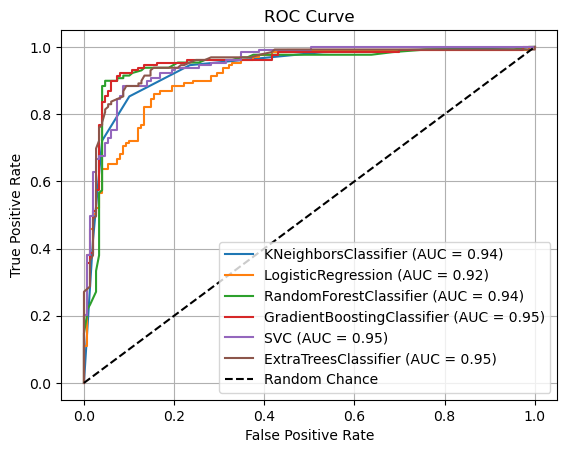

,Model,Accuracy,Precision,Recall,F1-Score
0,KNeighborsClassifier,0.877698,0.880000,0.852713,0.866142
1,LogisticRegression,0.848921,0.822222,0.860465,0.840909
2,RandomForestClassifier,0.924460,0.935484,0.899225,0.916996
3,GradientBoostingClassifier,0.917266,0.920635,0.899225,0.909804
4,SVC,0.895683,0.890625,0.883721,0.887160
5,ExtraTreesClassifier,0.892086,0.883721,0.883721,0.883721


In [70]:
# Define hyperparameter grids for each model
param_grids = {
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'ExtraTreesClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

results = []
for x in models:

    model_name = x.__class__.__name__
    print(f"Running Grid Search for {model_name}...")
    
    # Get the corresponding parameter grid
    param_grid = param_grids.get(model_name, {})
    if param_grid:
        grid_search = GridSearchCV(estimator=x, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test_scaled)
    y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else None
    
    x.fit(X_train_scaled, y_train)
    y_pred = x.predict(X_test_scaled)

    # ROC Curve (for binary or multi-class classification)
    if hasattr(x, "predict_proba"):
        y_prob = x.predict_proba(X_test_scaled)
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])  # Only for positive class
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{x.__class__.__name__} (AUC = {roc_auc:.2f})') 
    # Collect results
    results.append({
        'Model': x.__class__.__name__,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),  # Adjust `average` for multiclass
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1-Score': f1_score(y_test, y_pred, average='binary')
    })
    
# Add ROC curve decorations
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("ROCcurve.png", dpi=100, bbox_inches="tight")
plt.show()
# Convert results to a DataFrame
results_df = pd.DataFrame(results)
# Define a highlight function
def highlight_max(s):
    is_max = s == s.max()  # Identify maximum value in each column
    return ['background-color: red; color:black;' if v else '' for v in is_max]

# Apply the highlight function to the DataFrame
styled_results = results_df.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the styled DataFrame
styled_results